## Overview of the logistic regression model

Recall the definition of the logistic function:

$$ g(z) = \frac{1}{1 + \exp ( - z )} $$

The logistic regression algorithm seeks to predict a binary label $y \in \{ 0 , 1 \}$ for a given data point $x \in \mathbb{R}^n$. Given a training set of $m$ labeled data points $(x^i , y^i)$, we let $X$ be the $m \times n$ matrix whose $i^{th}$ row is $x^i$ and $y \in \{0,1\}^m$ be the vectorized list of labels for this data. For a parameter $\theta \in \mathbb{R}^n$ to be determined, we suppose that the probability that $x$ will have the label $y = 1$ is given by the logistic function precomposed with a linear map in $x$, i.e. 

$$P( y = 1 | x ; \theta) = h(\theta,x) = g(\theta \cdot x)$$

where $\theta \cdot x$ is the usual Euclidean inner product. We will choose $\theta$ according to maximum likelihood estimation, which means we seek to maximize likelihood of theta, i.e. the conditional probability, 

$$L(\theta) = P(y | X ; \theta) = \Pi_i P(y^i | x^i ; \theta) $$.

The equality here comes from the assumption that the labels of each observation $x^i$ are independent from one another.
Since $y^i$ is Bernoulli with parameter $h(\theta,x)$, setting $\ell(\theta) = \log L(\theta)$,

\begin{equation}
\begin{aligned}
\ell(\theta) =& \sum_i \log \left( h(\theta , x^i)^{y^i}(1 - h(\theta,x^i))^{1 - y^i} \right) \\
             =& \sum_i y^i \log h(\theta, x^i) + (1 - y^i) \log (1 - h(\theta,x^i))
\end{aligned}
\end{equation}

We seek to find the maximum of of $\ell(\theta)$. We first prove that this is a well-posed problem, i.e. that $\ell(\theta)$ is a concave function, $\nabla^2 \ell \leq 0$.



## Proof of the concavity of the log likelihood

First observe that 

$$1 - g(z) = \frac{\exp (-z)}{1 + \exp (-z)}$$ 

and so 

$$g'(z) = \frac{\exp (-z)}{(1 + \exp (-z))^2} = g(z)(1 - g(z))$$.

Consequently, $\partial_{\theta_j} h(\theta,x) = g'(x \cdot \theta)x_j$ and

$$\partial_{\theta_j}\ell = \sum_i y^i (1 - h(\theta,x^i))x^i_j - (1 - y^i) h(\theta,x^i)x^i_j $$

\begin{equation}
\begin{aligned}
\partial^2_{\theta_j \theta_k} \ell =& \sum_i - y^i g'(\theta \cdot x^i)x^i_jx^i_k - (1 - y^i)g'(\theta \cdot x^i)x^i_k x^i_j \\
=& - \sum_i g'(\theta \cdot x^i) x^i_jx^i_k
\end{aligned}
\end{equation}

Notice that $x^i \otimes x^i = x^i (x^i)^T \geq 0$. This together with $g'(z) > 0$ implies that the hessian of $\ell$ is negative semi-definite. To summarize, we have 

$$ \nabla \ell(\theta) = \sum_i (y^i - h(\theta, x^i))x^i $$

$$\nabla^2 \ell(\theta) = -\sum_i \frac{\exp(- x^i \cdot \theta) }{(1 + \exp (- x^i \cdot \theta ))^2} x^i \otimes x^i $$

We will actually consider the convex normalized function $\mathcal{L}(\theta) = -\frac{1}{m} \ell(\theta)$ and run newton's method to find the zero of 

$$ \nabla \mathcal{L}(\theta) = \frac{1}{m} \sum_i (h(\theta, x^i) - y^i)x^i $$

which has derivative equal to the hessian,

$$\nabla^2 \mathcal{L}(\theta) = \frac{1}{m} \sum_i \frac{\exp(- x^i \cdot \theta) }{(1 + \exp (- x^i \cdot \theta ))^2} x^i \otimes x^i $$


# Gaussian Discriminant Analysis

## The hypotheses 

GDA is a generative algorithm, meaning for a binary classification problem $x \in \mathbb{R}^n$ and $y \in \{0,1 \}$, it seeks to learn $p(x | y)$ by pre-supposing that both $p( x | y = 1)$ and $p(x | y = 0)$ are have multivariate Gaussian distributions with possibly different means, but the same covariance matrix. Recall that this means that the conditional distributions are

$$p(x | y = i) \sim q(z,\mu_i,\Sigma) = \frac{1}{(2\pi)^{\frac{n}{2}} |\Sigma|^\frac{1}{2}}\exp \left(-\frac{1}{2} \langle \Sigma^{-1}(z-\mu_i) , (z-\mu_i) \rangle \right) \, dz$$

Here, $\mu_i \in \mathbb{R}^n$ and the *covariance matrix* $\Sigma$ is $n \times n$, symmetric, and positive definite. We also suppose that $y$ is Bernoulli with $p(y = 1) = \phi$. Hence the parameters we are free to tune are $\xi = (\mu_0,\mu_1, \Sigma, \phi)$.

Recall that given random variables $X_1 , \dots , X_n$ we define the *likelihood* of the observations $X_i = x_i$ is 
$L = p(x_1,\dots,x_n)$ where $p$ is the joint distribution of the $X_i$. (Side note -- this only makes sense when the joint density can be interpreted as a function.)


let $X^i$ be the $i^{th}$ observation of the data. In this case, since each data point is independent from one another, the random variables $Z_i = (X^i , y^i)$ which are valued in $\mathbb{R}^n \times \{0,1\}$, are independent. The density of each $Z_i$ is 

$$\zeta_i(x,j) = p(x | y = j)p(j) = \frac{1}{(2\pi)^{\frac{n}{2}} |\Sigma|^\frac{1}{2}}\exp \left(-\frac{1}{2} \langle \Sigma^{-1}(x-\mu_j) , (x-\mu_j) \rangle \right) \phi^{j}(1-\phi)^{1-j} \, dz$$

And since we are assuming independence of the $Z_i$, the joint likelihood is equal to $L(\theta) = \Pi_i \, \zeta_i(x^i,y^i)$ and the log likelihood is

$$\ell(\theta) = -\sum_i \frac{1}{2}\left( n\log 2\pi + \log \det \, \Sigma + \langle \Sigma^{-1}(x^i - \mu_{y^i}, x^i - \mu_{y^i} \rangle  \right) - y^i\log \phi - (1-y^i)\log(1-\phi)$$

after finding the parameters which maximize the joint likelihood, we predict $p(y | x)$ using **Bayes' rule:**

$$p(y | X = x) = \frac{p(x | Y = y) p_Y(y)}{p_X(x)} = \frac{p(x | Y = y) p_Y(y)}{p(x | Y = 0)p_Y(0) + p(x | Y = 1)p_Y(1)}$$

Here, $p_X$ and $p_Y$ are the distributions of $X$ and $Y$.

## Show that the GDA fit line is logistic

We are going to show that there exists $\theta \in \mathbb{R}^n$ and $\theta_0 \in \mathbb{R}$ so that if $\xi = (\mu_0,\mu_1,\Sigma,\phi)$ are the MLE parameters for GDA, then

$$p(y = 1 | x ; \, \xi) = g(\theta_0 + \theta \cdot x)$$

where $g(z)$ is the logistic function. To put this differently, we are trying to show that $f( p(y = 1 | x ; \, \xi) )$ is affine in $x$, where $f = g^{-1}$. Now if 

$$y = \frac{1}{1 + \exp (-z)}$$

then 

$$ z = \log \frac{y}{1 - y}$$

so we need to calculate $$ \Xi(x , \mu , \Sigma, \phi) = \log \left( \frac{p( y = 1 | X = x ; \xi)}{p(y = 0 | X = x ; \xi)}  \right) $$

Using Bayes' rule, we have

\begin{equation}
\begin{aligned}
\Xi &= \log \left( \frac{p(x | y = 1)p(y = 1)}{p(x | y = 0)p(y = 0)} \right) \\
    &= \log \left( \frac{p(x | y = 1)}{p(x | y = 0)} \right) + \log \frac{\phi}{1 - \phi}
\end{aligned}
\end{equation}

After writing out the Gaussian densities and taking logs we are left with one extra piece that goes into the $\theta_0$ term (the normalizing coefficients) and a term which is quadratic in $x$. However, degree 2 part of the expression is the same in both the numerator and the denominator, so it cancels out and we are left with an affine expression in $x$. It is straightforward to check that this affine function is

$$ \Sigma^{-1}(\mu_1 - \mu_0) \cdot x + \frac{1}{2}\left( \langle \Sigma^{-1}\mu_0, \mu_0 \rangle - \langle \Sigma^{-1} \mu_1 , \mu_1 \rangle \right) + \log \frac{\phi}{1-\phi}$$

## Finding the parameters which maximize the joint likelihood of the GDA model

We use the notation $\xi = (\phi,\mu_0,\mu_1, \Sigma)$ to denote the full set of parameters we are maximizing with respect to. As shown above, the log likelihood is 


$$\ell(\theta) = - \sum_i \frac{1}{2} \log \det\Sigma + \frac{1}{2}\Sigma^{-1}(x^i - \mu^i) \cdot (x^i - \mu^i) - y^i\log\phi - (1 - y^i)\log (1 - \phi) $$

The $\mu^i$ appearing in the equation above is $\mu^i = y^i\mu_1 + (1 - y^i)\mu_0$ and allows us to avoid splitting the sum according to the value of $y^i$. We have also ignored the constant term since our purpose is to differentiate the above formula. We now calculate where $\ell$ is critical with respect to the full set of parameters $\xi$.


### The $\phi$-critical equation.

The first part of the sum has no $\phi$ dependence, so differentiating we get

$$\partial_\phi \ell = \sum_i \frac{y^i}{\phi} + \frac{y^i- 1}{1 - \phi} = \sum_i \frac{y^i - \phi}{\phi(1-\phi)}$$

This is zero if and only if $\sum_i y^i = m \phi$, $m$ being the total number of data points. Hence we see that 

$$\phi = \frac{ |\{i : y^i = 1\}| }{m}$$

or in other words, $\phi$ is the empirical chance of observing $y = 1$.


### The $\mu$-critical equations.

The critical equations are, For $k \in \{0,1\}$:

$$ \nabla_{\mu_k}\ell = \sum_{\{i: y^i = k \}} \Sigma^{-1}(x^i - \mu_k) = 0$$

Since $\Sigma$ is non-singular, we must have

$$\frac{1}{|\{i : y^i = k\}|}\sum_{\{i: y^i = k\}} x^i = \mu_k$$

i.e. each mean is the empirical average.

### The $\Sigma$-critical equation.

We begin by noting that the space of positive definite symmetric matrices is an open subset of the vector space $\mathscr{S}_n(\mathbb{R})$ of all of $n \times n$ real symmetric matrices. This means the tangent space at $\Sigma$ can be identified with $\mathscr{S}_n(\mathbb{R})$. We will calculate $D\ell_{\Sigma}(X)$ for a given $X \in \mathscr{S}_n(\mathbb{R})$. First we state two important formulas.

Let $\iota : GL_n(\mathbb{R}) \to GL_n(\mathbb{R})$ be inversion, i.e. $\iota(A) = A^{-1}$. Then, for any $n \times n$ matrix $M$ (the tangent space to $GL_n(\mathbb{R})$),

$$D\iota_A(M) = -A^{-1}MA^{-1}.$$

Also, if $A$ positive definite and $F(A) = \log \det A$, then

$$DF_A(X) = \text{tr}\, (A^{-T}X).$$

If we write $v^i = x^i - \mu^i$ then a straightforward calculation shows that $\ell$ is critical at $\Sigma$ if and only if for every $X \in \mathscr{S}_n(\mathbb{R})$,

$$ \text{tr}\,(X\Sigma^{-1}) - \frac{1}{m}\sum_i \langle X\Sigma^{-1} v^i , \Sigma^{-1} v^i \rangle = 0.$$

Note that for any $B \in \mathscr{S}_n(\mathbb{R})$ and $y \in \mathbb{R}$, 

$$ \text{tr}\, (B yy^T) = B_ik (yy^T)_{ki} = B_{ik}y_ky_i = \langle By , y\rangle$$

which means the critical equation can be re-written as


$$\text{tr} \, (X\Sigma^{-1}) - \frac{1}{m} \sum_i \text{tr} \, (X \Sigma^{-1}v^i (v^i)^T \Sigma^{-1}) = 0$$

and by linearity of the trace, this means that 

$$X\left( \Sigma^{-1} - \frac{1}{m} \sum_i \Sigma^{-1}v^i (v^i)^T \Sigma^{-1}  \right)$$

is traceless for every $X \in \mathscr{S}_n(\mathbb{R})$. But because $ (A,B) = \text{tr}\,(AB)$ is an inner product on symmetric matrices, this means 

$$\Sigma^{-1} - \frac{1}{m} \sum_i \Sigma^{-1}v^i (v^i)^T \Sigma^{-1} = 0$$

or $$\Sigma = \frac{1}{m}\sum_i v^i (v^i)^T$$

In [8]:
import numpy as np
import util
import linear_model
from p01b_logreg import LogisticRegression
from p01e_gda import GDA

def path(type,set):
    return '../data/ds{}_{}.csv'.format(set,type)

## Train the LogisticRegression model on both datasets and save predictions on the dataset.

# Load the datasets with intercepts to train regression

x_train_1_int , y_train_1 = util.load_dataset(path('train',1), add_intercept=True)
x_train_2_int , y_train_2 = util.load_dataset(path('train',2),add_intercept=True)

# Initalize the logistic regression model and train on the datasets. Save the theta values.

log_model_1 = LogisticRegression()

log_model_1.fit(x_train_1_int , y_train_1)
logreg_theta_1 = log_model_1.theta

log_model_2 = LogisticRegression()
log_model_2.fit(x_train_2_int,y_train_2)
logreg_theta_2 = log_model_2.theta

# Load the validation datasets 

x_valid_1_int , y_valid_1 = util.load_dataset(path('valid',1),add_intercept=True)
x_valid_2_int , y_valid_2 = util.load_dataset(path('valid',2),add_intercept=True)

# Make predictions and report the accuracy.

logreg_y_predict_1 = log_model_1.predict(x_valid_1_int)
logreg_y_predict_2 = log_model_2.predict(x_valid_2_int)

logreg_prediction_rate_1 = 1 - np.absolute(logreg_y_predict_1 - y_valid_1).mean()
logreg_prediction_rate_2 = 1 - np.absolute(logreg_y_predict_2 - y_valid_2).mean()

print('logreg predicts dataset 1 labels with {} percent accuracy'.format(logreg_prediction_rate_1 * 100))
print('logreg predicts dataset 2 labels with {} percent accuracy'.format(logreg_prediction_rate_2 * 100))

logreg predicts dataset 1 labels with 90.0 percent accuracy
logreg predicts dataset 2 labels with 91.0 percent accuracy


In [9]:
## Repeat the previous coding block with the GDA model.

import numpy as np
import util
import linear_model
from p01b_logreg import LogisticRegression
from p01e_gda import GDA

def path(type,set):
    return '../data/ds{}_{}.csv'.format(set,type)

## Train the LogisticRegression model on both datasets and save predictions on the dataset.

# Load the datasets with intercepts to train regression

x_train_1 , y_train_1 = util.load_dataset(path('train',1))
x_train_2 , y_train_2 = util.load_dataset(path('train',2))

# Initalize the logistic regression model and train on the datasets. Save the theta values.

gda_model_1 = GDA()
gda_model_1.fit(x_train_1 , y_train_1)
gda_theta_1 = gda_model_1.theta

gda_model_2 = GDA()
gda_model_2.fit(x_train_2 , y_train_2)
gda_theta_2 = gda_model_2.theta

# Load the validation datasets 

x_valid_1 , y_valid_1 = util.load_dataset(path('valid',1),add_intercept=False)
x_valid_2 , y_valid_2 = util.load_dataset(path('valid',2),add_intercept=False)

# Make predictions and report the accuracy.

gda_y_predict_1 = gda_model_1.predict(x_valid_1)
gda_y_predict_2 = gda_model_2.predict(x_valid_2)

gda_prediction_rate_1 = 1 - np.absolute(gda_y_predict_1 - y_valid_1).mean()
gda_prediction_rate_2 = 1 - np.absolute(gda_y_predict_2 - y_valid_2).mean()

print('gda predicts dataset 1 labels with {} percent accuracy'.format(gda_prediction_rate_1 * 100))
print('gda predicts dataset 2 labels with {} percent accuracy'.format(gda_prediction_rate_2 * 100))


gda predicts dataset 1 labels with 83.0 percent accuracy
gda predicts dataset 2 labels with 91.0 percent accuracy


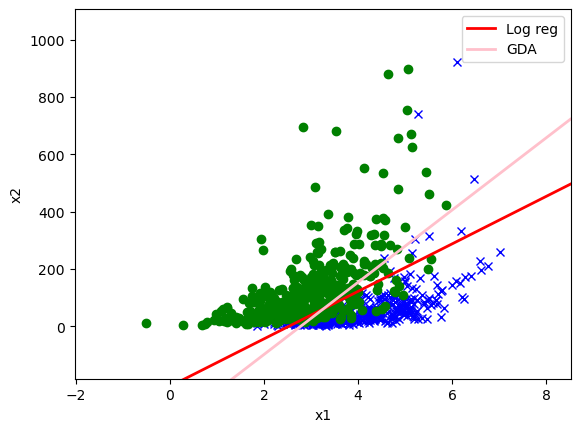

In [10]:
## Plots of the performances of logreg vs GDA on the training and validation sets. Dataset 1:

## Rewrite the plot funcitonality in order to accept two theta values and compare.

util.plot_compare(x_train_1,y_train_1,theta_1=logreg_theta_1,theta_2=gda_theta_1,name_1='Log reg',name_2 = 'GDA')




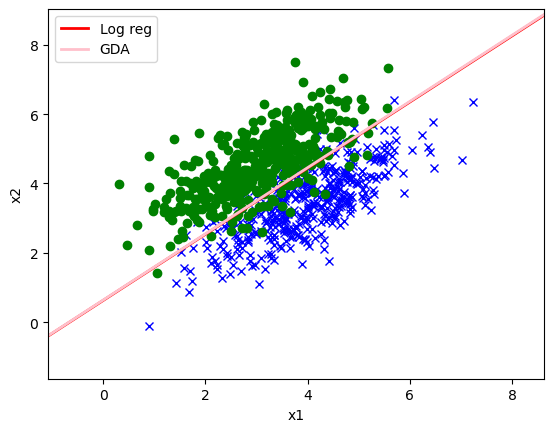

In [11]:
## Make the same plot for dataset 2:

util.plot_compare(x_train_2,y_train_2,theta_1=logreg_theta_2,theta_2=gda_theta_2,name_1='Log reg',name_2 = 'GDA')

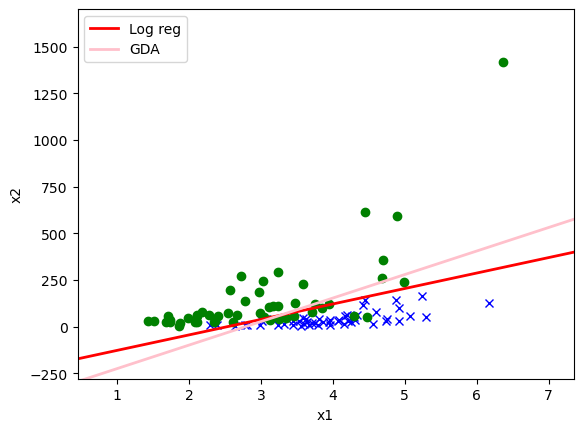

In [12]:
## Now we compare them both on the validation sets. Validation set 1:

util.plot_compare(x_valid_1,y_valid_1,theta_1=logreg_theta_1,theta_2=gda_theta_1,name_1='Log reg',name_2 = 'GDA')

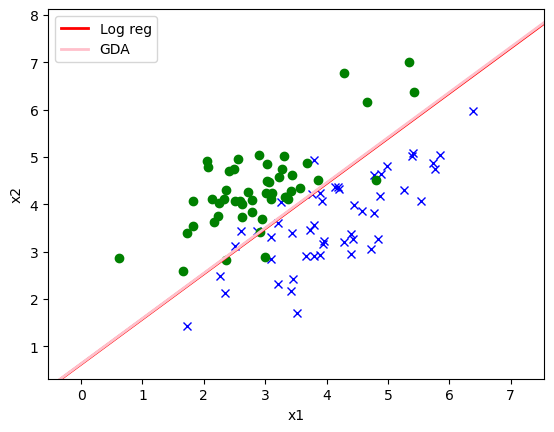

In [13]:
## And now dataset 2, where both perform horribly?

util.plot_compare(x_valid_2,y_valid_2,theta_1=logreg_theta_2,theta_2=gda_theta_2,name_1='Log reg',name_2 = 'GDA')

# Problem 2: Incomplete, positive only labels.

.
